In [114]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [91]:
df=pd.read_csv('concrete_data.csv')

In [92]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [93]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [94]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['Strength']),df['Strength'],test_size=0.2,random_state=42)

In [96]:
x_train

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3
...,...,...,...,...,...,...,...,...
87,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,3
330,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,14
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100
121,475.0,118.8,0.0,181.1,8.9,852.1,781.5,28


In [97]:
# Apply model Without Transfrom 
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(x_train,y_train)
y_predict=lr.predict(x_test)

# See r2 Score
from sklearn.metrics import r2_score
# Calculate R-squared score
r2 = r2_score(y_test, y_predict)
print("R-squared Score:", r2)

R-squared Score: 0.6275531792314851


In [98]:
# Cross checkeing with cross value score
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(lr,df.drop(columns=['Strength']),df['Strength'],scoring='r2'))

0.46099404916628633

In [119]:
# plot with out any Transfrom : 

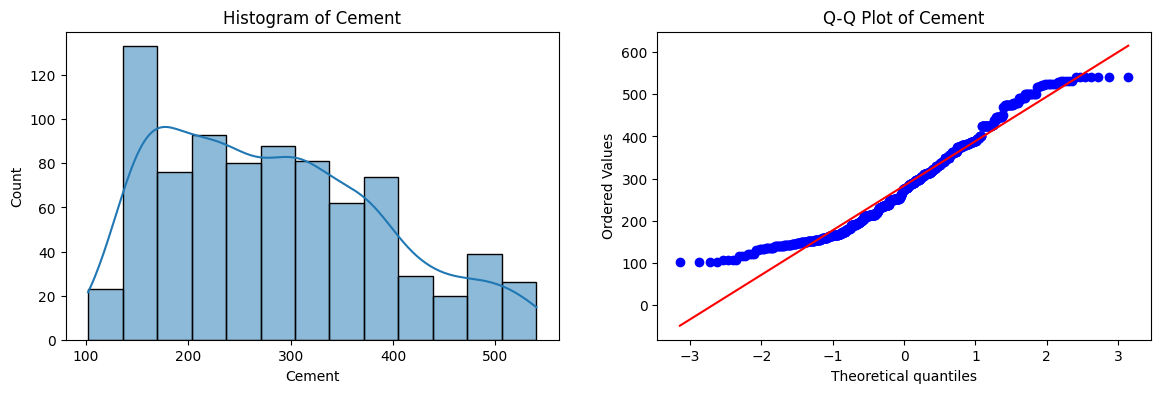

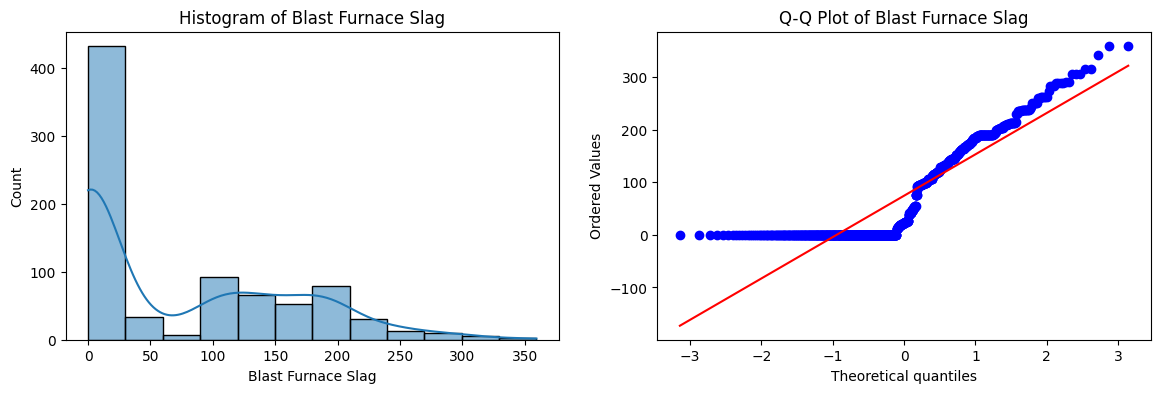

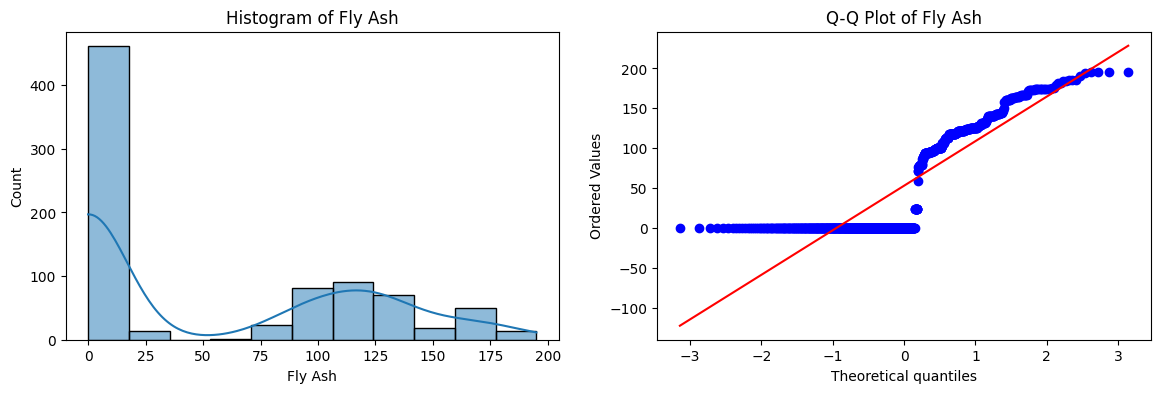

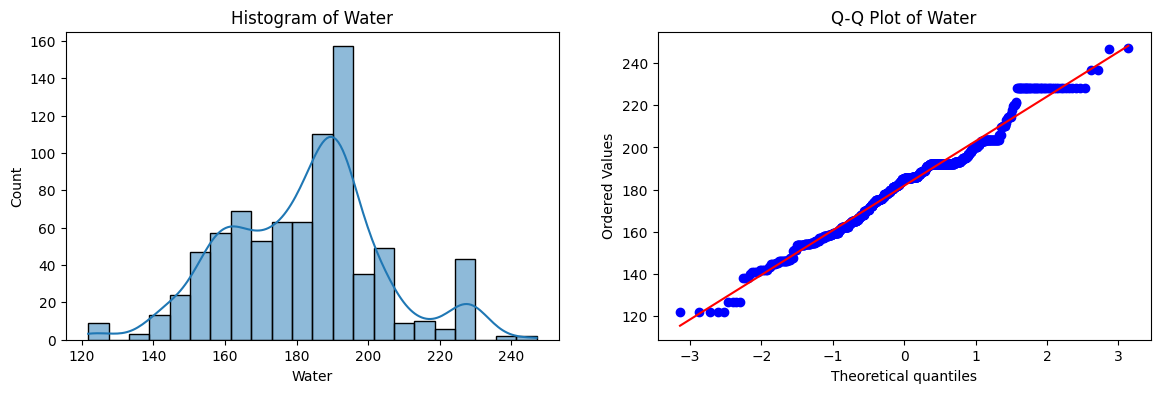

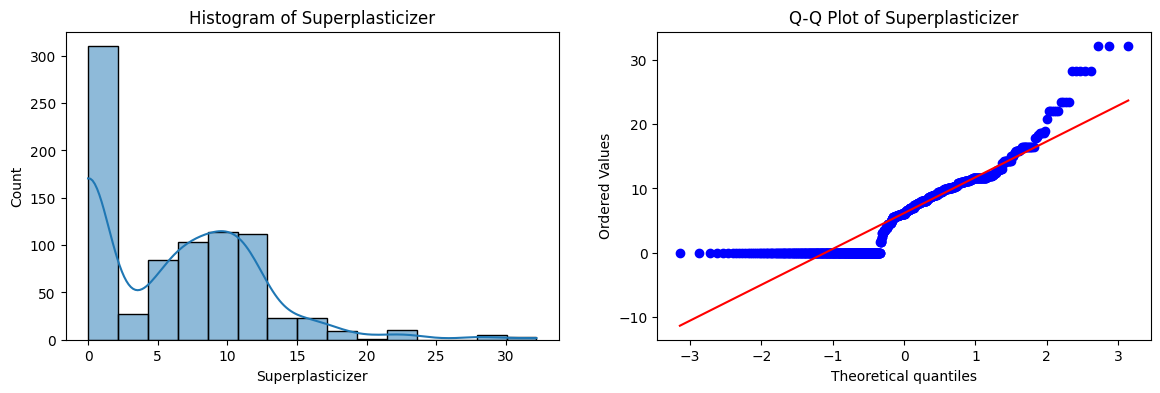

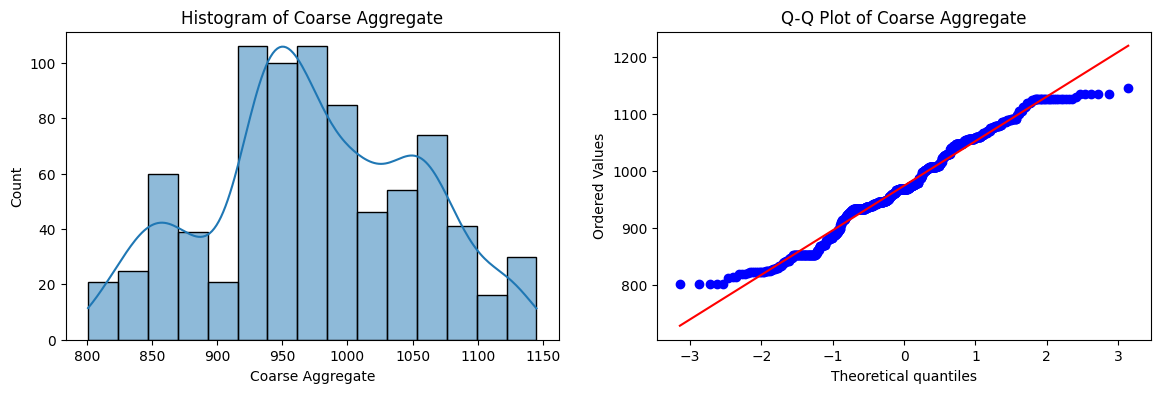

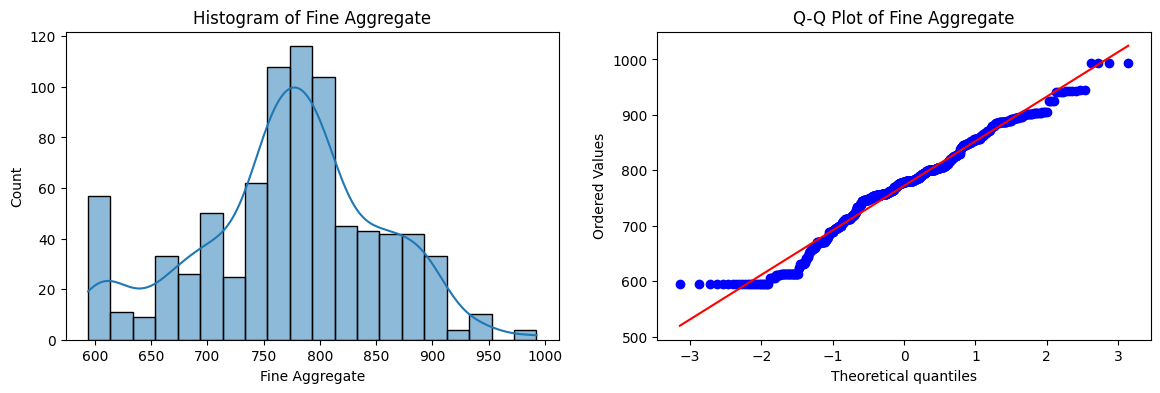

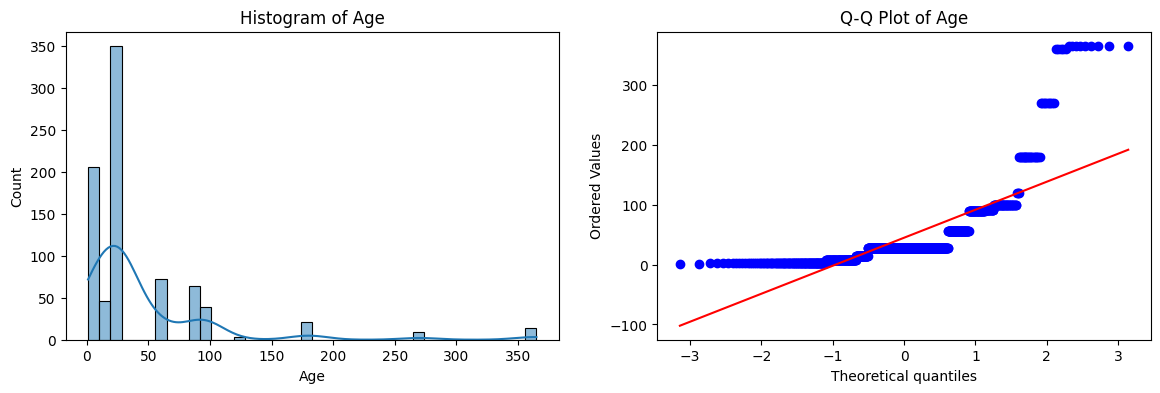

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Loop through each column in x_train
for col in x_train.columns:
    plt.figure(figsize=(14, 4))
    
    # Histogram (Left Subplot)
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
    sns.histplot(x_train[col], kde=True)  # Use sns.histplot for histogram
    plt.title(f'Histogram of {col}')  # Include column name in the title
    
    # Q-Q Plot (Right Subplot)
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
    stats.probplot(x_train[col], dist="norm", plot=plt)  # Use stats.probplot for Q-Q plot
    plt.title(f'Q-Q Plot of {col}')  # Include column name in the title
    
    plt.show()  # Show the plots

In [121]:
# Now Use Transfrom Data and Check Accuracy

In [122]:
# Applying Box-Cox Transform each columns

In [128]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='box-cox')

x_train_transformed_data=pt.fit_transform(x_train+0.000001)
x_test_transformed_data=pt.fit_transform(x_test+0.000001)

# now create a data frame
pd.DataFrame({'cols':x_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.215602
1,Blast Furnace Slag,0.025996
2,Fly Ash,-0.006544
3,Water,0.959062
4,Superplasticizer,0.103365
5,Coarse Aggregate,1.192492
6,Fine Aggregate,1.973781
7,Age,-0.014692


In [130]:
# # Applying linear regression on transformed data
lr=LinearRegression()
lr.fit(x_train_transformed_data,y_train)
y_predict2=lr.predict(x_test_transformed_data)
r2_score(y_test,y_predict2)


0.8055321004700795

In [136]:
# # Apply Cross Value Score
# pt=PowerTransformer(method='box-cox')
# x_trasformed2=pt.fit_transform(df.drop(columns=['Strength'])+0.000001)
# lr=LinearRegression()
# np.mean(cross_val_score(lr,x_trasformed2,df.columns['Strength'],scoring='r2'))

